<a href="https://colab.research.google.com/github/SethBuzhardt/rdyjdyjdyjd/blob/main/Home_Prices_Seth_Buzhardt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preliminaries

#Imports


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

#Load Data

In [18]:
house_data_path='https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv'
df_house=pd.read_csv(house_data_path) # invoke Pandas and use read_csv() method passing in the parameter of the csv location, in this case a url address
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Linear Regression


#Set Up

In [20]:
df_house["TotalSF"]=df_house['1stFlrSF']+df_house['2ndFlrSF'] #Total Sq Ft of the 1st floor and 2nd.
df_house['Sub2']=df_house['2ndFlrSF']-df_house['1stFlrSF']    #Subtraction of 1st and 2nd Floor.
df_house['diff2']=df_house['1stFlrSF']-df_house['2ndFlrSF']   #Subtraction of 2nd and 1st Floor.
df_house["Age_of_house"]=df_house["YearBuilt"]-2022           #Age of house by Year built - 2022

In [21]:
def model_eval(X=True):
  Y = df_house['SalePrice']
  lm = LinearRegression()
  lm.fit(X, Y)
  Y_hat = lm.predict(X)
  mse = mean_squared_error(Y_hat, Y)
  print('The mean square error of price and predicted value is: ', mse)
  print('The R-square is: ', lm.score(X,Y))
  width = 12
  height = 10
  plt.figure(figsize=(width, height))


  ax1 = sns.distplot(df_house['SalePrice'], hist=False, color="r", label="Actual Value")
  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


  plt.title('Correlation between X variable and Sale Price')
  plt.xlabel('Sale Price')
  plt.ylabel('X')

  plt.show()
  plt.close()
  return


## Linear Model 1

The mean square error of price and predicted value is:  2119090222.7760873
The R-square is:  0.6639985320423227


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


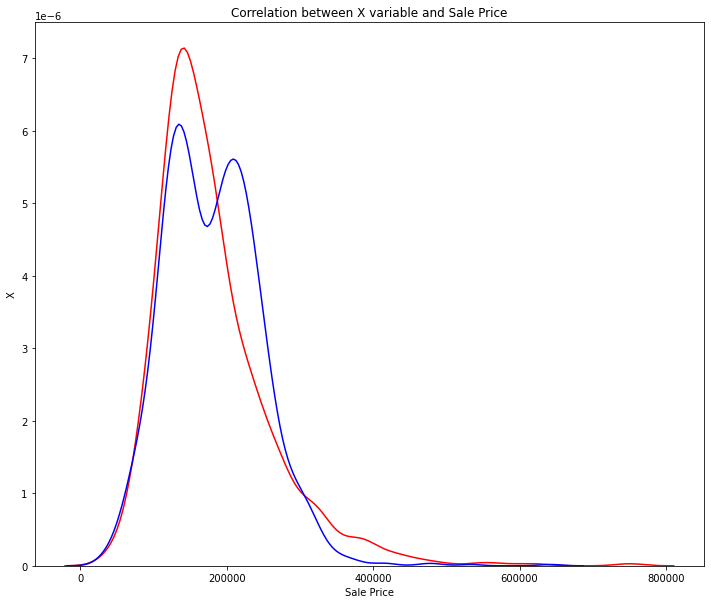

In [22]:
model_eval(X=df_house[["Age_of_house",'TotalSF','LotArea']])

## Linear Model 2

The mean square error of price and predicted value is:  3572229478.0285664
The R-square is:  0.43358978508858326


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


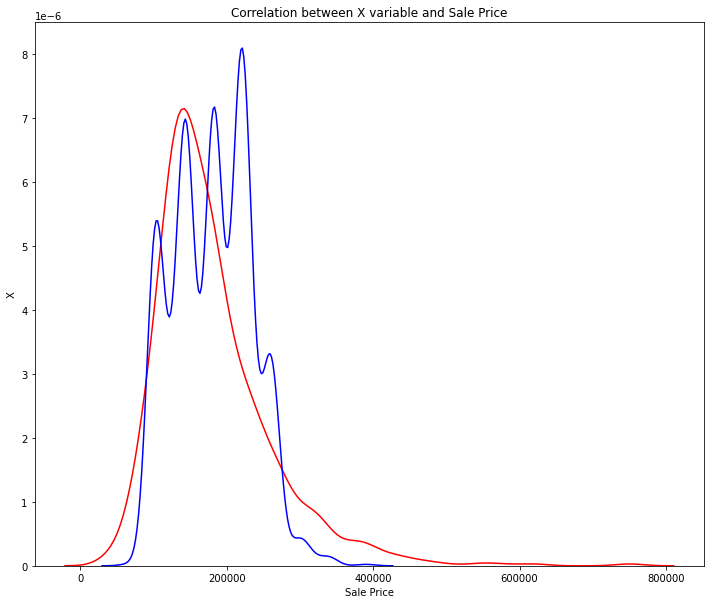

In [23]:
model_eval(X=df_house[['HalfBath','FullBath','BsmtHalfBath','BsmtFullBath']])

## Linear Model 3

The mean square error of price and predicted value is:  3242694979.131447
The R-square is:  0.4858405454300081


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


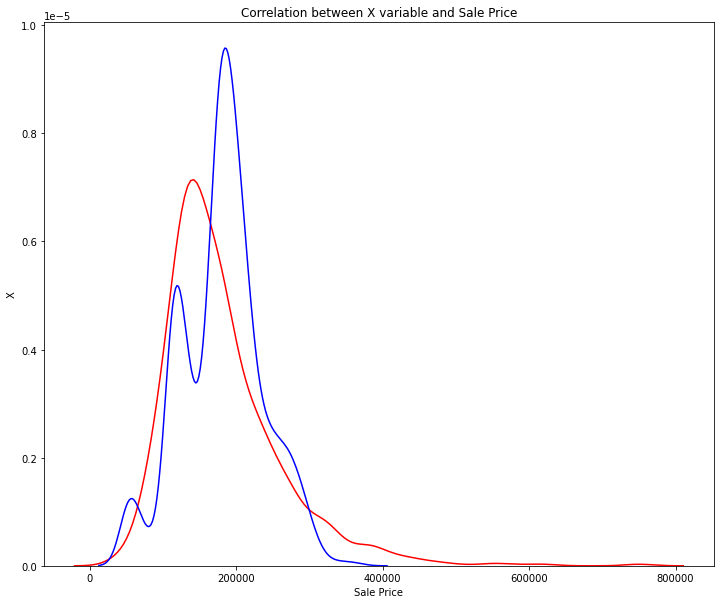

In [24]:
model_eval(X=df_house[['MoSold','YrSold','GarageArea','GarageCars','WoodDeckSF','OpenPorchSF']])